## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy as sp

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [3]:
# Study Data
study_results.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset (mt = mouse study)
ms_data=pd.merge(mouse_metadata,study_results,how="left",on="Mouse ID")
ms_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen

mice = ms_data["Mouse ID"].unique()
drugs = ms_data["Drug Regimen"].unique()
time = ms_data["Timepoint"].unique()

num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"Number of Mice": [num_mouse],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})
data_summary

,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


## Summary statistics

In [6]:

mean_volume = pd.DataFrame(round(ms_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_volume = pd.DataFrame(round(ms_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
median_volume = median_volume.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = pd.DataFrame(round(ms_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

stdev = pd.DataFrame(round(ms_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})

SEM = pd.DataFrame(round(ms_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_stat = [mean_volume, median_volume, variance, stdev, SEM]
summary_stat = pd.concat(summary_stat,axis=1,join='inner')
summary_stat

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# clear statistical Analysis
stat_analysis= pd.DataFrame(round(ms_data.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)'],2))

stat_analysis

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

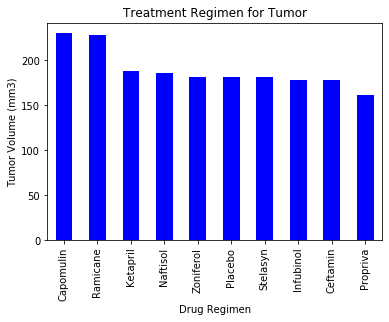

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_regimen = ms_data['Drug Regimen'].value_counts()
treatment_bar_graph = treatment_regimen.plot(kind='bar', facecolor='blue')

plt.title('Treatment Regimen for Tumor')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')




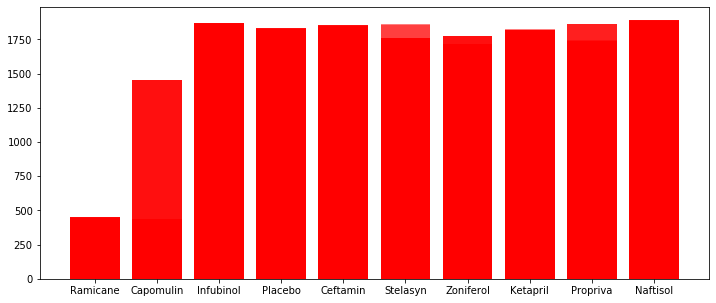

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(ms_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(ms_data["Drug Regimen"], x_axis, color='r', alpha=0.5, align="center")
plt.show()

## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = pd.DataFrame(ms_data["Sex"].value_counts())
gender_count

,Sex
Male,958
Female,935


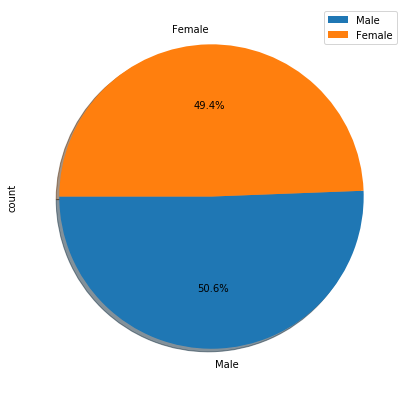

In [12]:

gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(7,7 ),autopct="%1.1f%%", shadow=True, startangle=180)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x1a1b961a10>,
 [Text(0.022900912879184488, -1.1997814585120492, 'Male'),
  Text(-0.020992503472585647, 1.0997996703027118, 'Female')],
 [Text(0.013358865846190952, -0.699872517465362, '50.6%'),
  Text(-0.011450456439592171, 0.5998907292560246, '49.4%')])

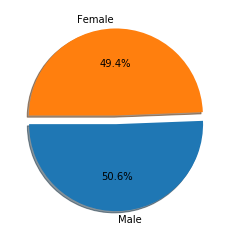

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = pd.DataFrame(ms_data["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0.1,0)
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)

## Quartiles, outliers and boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = ms_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_mean = pd.DataFrame(tumor_vols_mean)

# Preview DataFrame
tumor_mean



,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Calculating IQR for Capomulin
ceftamin_df=ms_data.loc[ms_data['Drug Regimen']=="Ceftamin"]
timecount_cef = ceftamin_df.sort_values(by=['Timepoint'])
lastval_cef = timecount_cef.groupby(['Mouse ID']).last()
lastval_cef = lastval_cef.sort_values(by=['Tumor Volume (mm3)'])
tumvol_cef = lastval_cef['Tumor Volume (mm3)']
quartiles_cef = tumvol_cef.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef




print(f"The lower quartile is: {lowerq_cef}")
print(f"The upper quartile is: {upperq_cef}")
print(f"The interquartile range of temperatures is: {iqr_cef}")
print(f"The the median of temperatures is: {quartiles_cef[0.5]} ")

lower_bound = lowerq_cef - (1.5*iqr_cef)
upper_bound = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

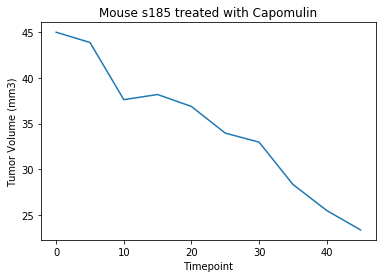

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = ms_data.loc[ms_data['Mouse ID'] == 's185']
time = s185_df['Timepoint']
volume = s185_df['Tumor Volume (mm3)']
fig3, ax3 = plt.subplots()
plt.plot(time, volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 treated with Capomulin")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen